In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = os.path.join(os.path.expanduser('~'), 'data', 'competitive-data-science-predict-future-sales', 'sales_train.csv')

sales_train = pd.read_csv(path)
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [3]:
monthly_sales = sales_train.groupby(['date_block_num', 'shop_id', 'item_id'])['item_cnt_day'].sum().reset_index()
monthly_sales.rename(columns={'item_cnt_day': 'item_cnt_month'}, inplace=True)
monthly_sales

,date_block_num,shop_id,item_id,item_cnt_month
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0
...,...,...,...,...
1609119,33,59,22087,6.0
1609120,33,59,22088,2.0
1609121,33,59,22091,1.0
1609122,33,59,22100,1.0


In [27]:
# a matrix that has the monthly sales for each item in each shop is column
monthly_sales_matrix = monthly_sales.pivot_table(index = ['shop_id', 'item_id'], columns = 'date_block_num', values = 'item_cnt_month', fill_value=0)

monthly_sales_matrix['sum'] = monthly_sales_matrix.sum(axis=1)
monthly_sales_matrix['median'] = monthly_sales_matrix.median(axis=1)
monthly_sales_matrix['mean'] = monthly_sales_matrix.mean(axis=1)
monthly_sales_matrix['std'] = monthly_sales_matrix.std(axis=1)
monthly_sales_matrix['max'] = monthly_sales_matrix.max(axis=1)
monthly_sales_matrix['min'] = monthly_sales_matrix.min(axis=1)
monthly_sales_matrix['skew'] = monthly_sales_matrix.skew(axis=1)
monthly_sales_matrix['kurt'] = monthly_sales_matrix.kurt(axis=1)
monthly_sales_matrix.iloc[:, :34]

date_block_num    0     1    2    3    4    5    6    7    8    9   ...   24  \
shop_id item_id                                                     ...        
0       30       0.0  31.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        31       0.0  11.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        32       6.0  10.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        33       3.0   3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        35       1.0  14.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
...              ...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
59      22154    1.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        22155    0.0   0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0   
        22162    0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        22164    0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        22167    0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0   

date_block_num    25   26   27   28   29   30   31   32   33  
shop_id item_id                                               
0       30       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        31       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        32       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        33       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        35       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...              ...  ...  ...  ...  ...  ...  ...  ...  ...  
59      22154    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        22155    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        22162    9.0  4.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  
        22164    2.0  1.0  2.0  0.0  0.0  1.0  0.0  0.0  0.0  
        22167    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[424124 rows x 34 columns]

In [5]:
monthly_sales_matrix.loc[~(monthly_sales_matrix == 0).all(axis=1)]

date_block_num    0     1    2    3    4    5    6    7    8    9   ...   24  \
shop_id item_id                                                     ...        
0       30       0.0  31.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        31       0.0  11.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        32       6.0  10.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        33       3.0   3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        35       1.0  14.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
...              ...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
59      22154    1.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        22155    0.0   0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0   
        22162    0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        22164    0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
        22167    0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0   

date_block_num    25   26   27   28   29   30   31   32   33  
shop_id item_id                                               
0       30       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        31       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        32       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        33       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        35       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...              ...  ...  ...  ...  ...  ...  ...  ...  ...  
59      22154    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        22155    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        22162    9.0  4.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  
        22164    2.0  1.0  2.0  0.0  0.0  1.0  0.0  0.0  0.0  
        22167    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[423873 rows x 34 columns]

In [6]:
a = monthly_sales_matrix.loc[(monthly_sales_matrix > 0).sum(axis=1) >= 34]


In [7]:
monthly_sales.reset_index()[(monthly_sales['shop_id'] == 5) & (monthly_sales['item_id'] == 5320)]

,index,date_block_num,shop_id,item_id,item_cnt_month


In [8]:
sales_train[(sales_train['shop_id'] == 5) & (sales_train['item_id'] == 5320)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day


In [9]:
# print row that max in col 33
tmp_ = monthly_sales_matrix.loc[monthly_sales_matrix[33] == monthly_sales_matrix[33].max()]
tmp_

,date_block_num,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
shop_id,item_id,,,,,,,,,,,,,,,,,,,,,
12,11373,6.0,2.0,21.0,9.0,7.0,28.0,9.0,39.0,33.0,51.0,...,133.0,117.0,147.0,292.0,742.0,202.0,201.0,75.0,246.0,2253.0


In [10]:
tmp__ = sales_train[(sales_train['shop_id'] == tmp_.index[0][0]) & (sales_train['item_id'] == tmp_.index[0][1])]
tmp__

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
58323,08.01.2013,0,12,11373,1000.00,1.0
58324,31.01.2013,0,12,11373,97.80,5.0
176790,01.02.2013,1,12,11373,229.00,1.0
176791,04.02.2013,1,12,11373,130.00,1.0
302468,29.03.2013,2,12,11373,139.50,2.0
...,...,...,...,...,...,...
2909829,07.10.2015,33,12,11373,855.00,2.0
2909830,06.10.2015,33,12,11373,208.80,5.0
2909831,05.10.2015,33,12,11373,140.75,16.0
2909832,02.10.2015,33,12,11373,648.50,2.0


In [11]:
sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [12]:
tmp__.iloc[:, 0] = pd.to_datetime(tmp__.iloc[:, 0], format='%d.%m.%Y')
tmp__.sort_values(by='date', inplace=True)

/tmp/ipykernel_284946/3024474230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp__.sort_values(by='date', inplace=True)


date
2013-01-08     1.0
2013-01-31     5.0
2013-02-01     1.0
2013-02-04     1.0
2013-03-11     2.0
              ... 
2014-11-28     4.0
2014-12-01    41.0
2014-12-02     1.0
2014-12-03    13.0
2014-12-04     7.0
Name: item_cnt_day, Length: 264, dtype: float64

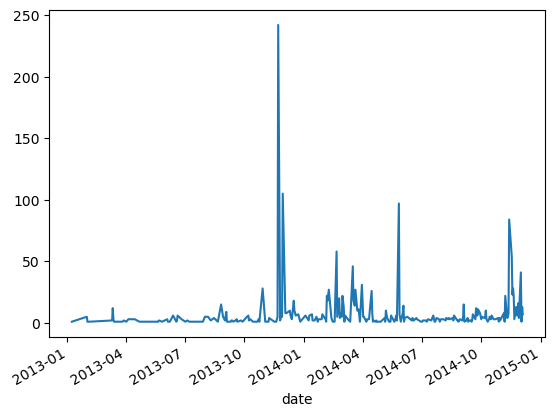

In [13]:
# dayly
tmp__.groupby('date')['item_cnt_day'].sum()[:-200].plot()
tmp__.groupby('date')['item_cnt_day'].sum()[:-200]

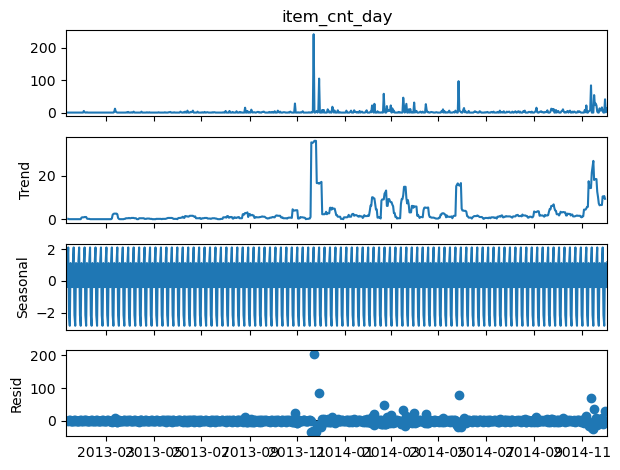

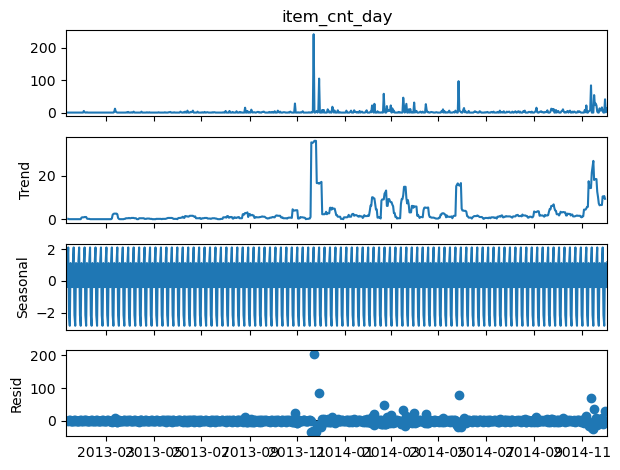

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Your DataFrame
df = tmp__.groupby('date')['item_cnt_day'].sum()[:-200]

# # Ensure the index is a DatetimeIndex
df.index = pd.DatetimeIndex(df.index)

# # Set the frequency of the DatetimeIndex
df = df.asfreq('D')  # Change 'D' to the correct frequency: 'D' for daily, 'M' for monthly, etc.
df.fillna(0, inplace=True)

# # Perform seasonal decomposition
result = seasonal_decompose(df, model='additive')

result.plot()

In [15]:
df

date
2013-01-08     1.0
2013-01-09     0.0
2013-01-10     0.0
2013-01-11     0.0
2013-01-12     0.0
              ... 
2014-11-30     0.0
2014-12-01    41.0
2014-12-02     1.0
2014-12-03    13.0
2014-12-04     7.0
Freq: D, Name: item_cnt_day, Length: 696, dtype: float64

<Axes: xlabel='date_block_num'>

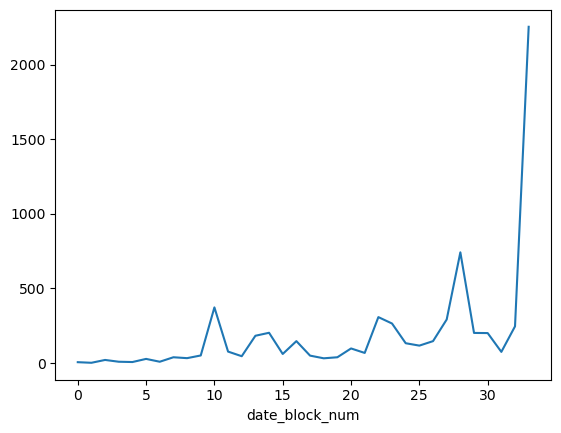

In [16]:
# monthly
tmp__.groupby('date_block_num')['item_cnt_day'].sum().plot()